In [2]:
#imports
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
from scipy import stats
import re
import ast
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
os.chdir('/Users/andrewcaffey/Documents/Projects/Data/PCPP/builds/')
df = pd.read_csv('master_build_csv.csv', low_memory=False)

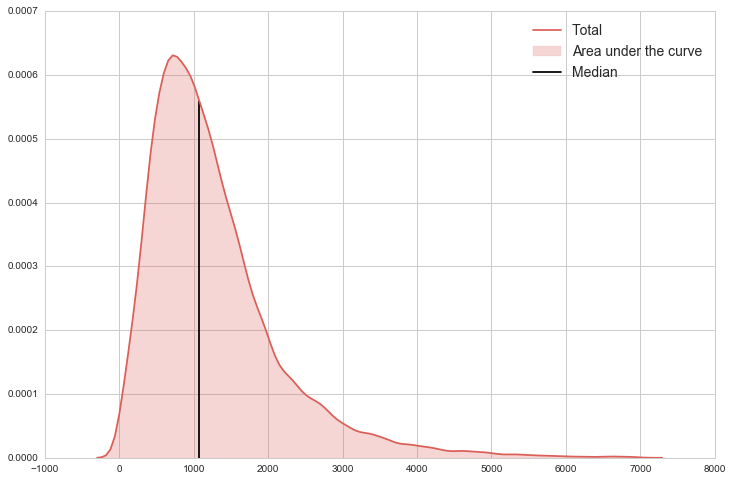

In [5]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("hls", 1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
data = df[(df.total>0)&(df.total<7000)].total
p = sns.kdeplot(data, shade=True, cumulative=False, shade_lowest=True)

x,y = p.get_lines()[0].get_data()

#care with the order, it is first y
#initial fills a 0 so the result has same length than x
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()

x_median = x[nearest_05]
y_median = y[nearest_05]
plt.vlines(x_median, 0, y_median)

plt.legend(['KDE', 'Area under the curve', 'Median'], fontsize=14)
plt.show()
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/lith_vs_price.png'))

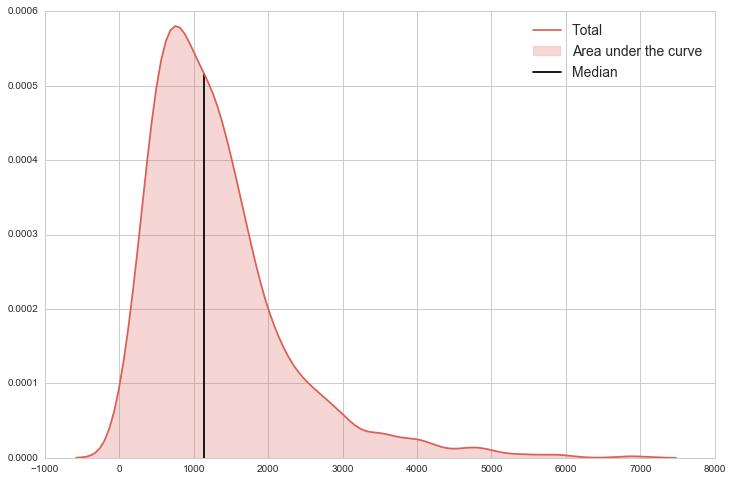

In [4]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("hls", 1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
data = df[(df.total>0)&(df.total<7000)].sample(1000).total
p = sns.kdeplot(data, shade=True, cumulative=False, shade_lowest=True)

x,y = p.get_lines()[0].get_data()

#care with the order, it is first y
#initial fills a 0 so the result has same length than x
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()

x_median = x[nearest_05]
y_median = y[nearest_05]
plt.vlines(x_median, 0, y_median)

plt.legend(['Total', 'Area under the curve', 'Median'], fontsize=14)
plt.show()
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/lith_vs_price.png'))

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text yticklabel objects>)

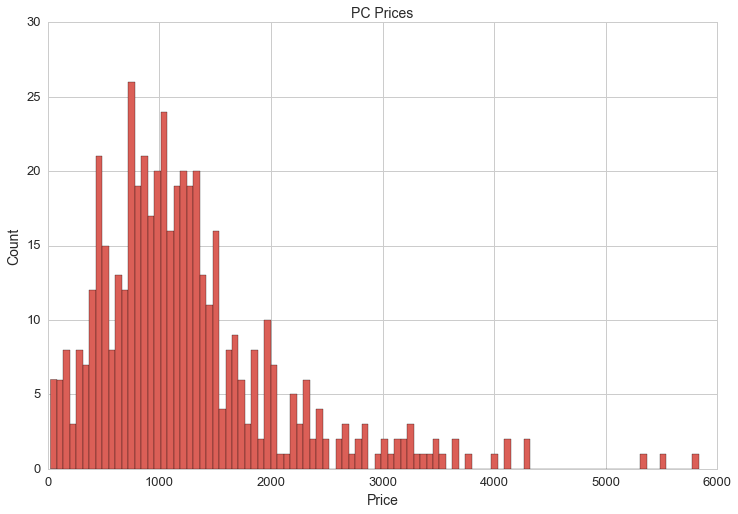

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
df[(df.total>0)&(df.total<7000)].sample(500).total.hist(bins=100)
plt.title('PC Prices', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [ ]:
plt.figure(figsize=(12,8))
ax = df[(df.total>0)&(df.total<7000)].total.plot(kind='hist', bins=100)
plt.axes([0,8000,0,1200])
df[(df.total>0)&(df.total<7000)].total.plot(kind='kde', ax=ax, secondary_y=True)


(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 7 Text yticklabel objects>)

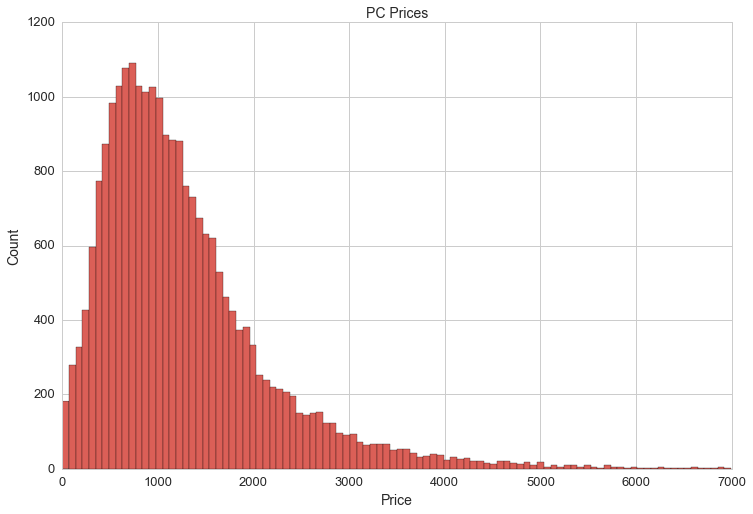

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
#df[(df.total>0)&(df.total<7000)].total.hist(bins=100)
plt.hist(df[(df.total>0)&(df.total<7000)].total, bins=100)

plt.title('PC Prices', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [ ]:
#navigate to the builds DataFrame
os.chdir('/Users/andrewcaffey/Documents/Projects/Data/PCPP/builds/')

#read in the builds DataFrame
df = pd.read_csv('master_build_csv.csv', low_memory=False)

#Setup a new DataFrame that contains only unique IDs for the PSU of each build
df1 = df[['Power_Supply_1_link']]

#navigate to the PSU DataFrame
os.chdir(os.path.expanduser('~/Documents/Projects/Data/PCPP/parts/x_csv_files/'))

#read in psu DataFrame
psu_df = pd.read_csv('psu_csv.csv')

#Filter for certain columns we are interested in
psu_columns = [u'Modular', u'Name', u'avg', u'short_link', u'power', u'eff_rank', u'ppw', u'Manufacturer', u'Efficiency Certification']

#redefine the DataFrame to include those columns only
psu_df = psu_df[psu_columns]

In [60]:
#merge DataFrames
df1 = pd.merge(df1, psu_df, how='left',left_on='Power_Supply_1_link', right_on='short_link')

In [61]:
df1.shape

(25851, 10)

In [28]:
df1 = pd.merge(df1, psu_df, how='left',left_on='Power_Supply_1_link', right_on='short_link')

In [30]:
df1.

corsair-power-supply-cx600m      1144
evga-power-supply-220g20750xr     990
corsair-power-supply-cx750m       896
evga-power-supply-220g20850xr     642
corsair-power-supply-cx500m       616
evga-power-supply-120g10650xr     555
corsair-power-supply-cx430m       494
corsair-power-supply-rm750        454
evga-power-supply-100b10500kr     431
corsair-power-supply-cx430        408
Name: Power_Supply_1_link, dtype: int64

In [47]:
df1[df.short_link.isnull().sum()

2030

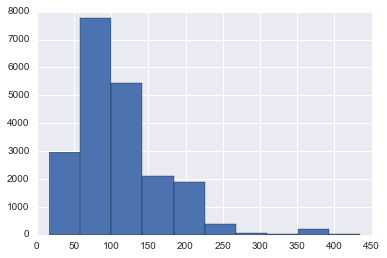

In [44]:
df1[df1.power>0].avg.hist(bins=10)

In [13]:
psu_df.PSU_1_short_link.head()

0               evga-power-supply-100b10500kr
1        seasonic-power-supply-m12ii520bronze
2              seasonic-power-supply-ssp350se
3    cooler-master-power-supply-rs400psari3us
4              cougar-power-supply-cougara500
Name: PSU_1_short_link, dtype: object

In [14]:
df1.shape

(25851,)

In [16]:
df.shape

(25851, 452)

In [ ]:
df = pd.merge(df, cpu_df, left_on='CPU_1_link', right_on='__CPU_1_short_link')

In [ ]:
df.shape

In [ ]:
motherboard_df.columns = ['__Motherboard_1_' + x for x in motherboard_df.columns]

In [ ]:
df = pd.merge(df, motherboard_df, left_on='Motherboard_1_link', right_on='__Motherboard_1_short_link')

In [ ]:
df.shape

In [ ]:
cpu_cooler_df.columns = ['__CPU_Cooler_1_' + x for x in cpu_cooler_df.columns]

In [ ]:
df = pd.merge(df, cpu_cooler_df, left_on='CPU Cooler_1_link', right_on='__CPU_Cooler_1_short_link')

In [ ]:
df.shape

In [ ]:
avg_cols = [col for col in df.columns if '_short_link' in col]

In [ ]:
df = pd.merge(df, gpu_df, left_on='Video_Card_1_link', right_on='short_link')

In [ ]:
df = pd.merge(df, gpu_df, left_on='Video_Card_1_link', right_on='short_link')

In [ ]:
result[['short_link_y', 'Video_Card_1_link']].sample(5)

In [ ]:
link_cols = [col for col in result.columns if '_link' in col]

In [ ]:
#group relevant columns for each part

In [6]:
os.chdir(os.path.expanduser('~/Documents/Projects/Data/PCPP/parts/x_csv_files/'))

#psu
psu_df = pd.read_csv('psu_csv.csv')
psu_columns = [u'Modular', u'Name', u'avg', u'short_link', u'power', u'eff_rank', u'ppw', u'Manufacturer', u'Efficiency Certification']
psu_df = psu_df[psu_columns]

In [11]:
#case
case_df = pd.read_csv('case_csv.csv')
case_cols = [u'Color', u'Manufacturer', u'Name', u'dim', u'vol', u'avg', u'short_link', u'Type']
case_df = case_df[case_cols]

In [ ]:
#mobo

In [10]:
motherboard_df = pd.read_csv('mobo_csv.csv')
motherboard_cols = [u'avg',u'short_link', u'socket', u'max_mem', u'mem_slots', u'Chipset']
motherboard_df = motherboard_df[motherboard_cols]

In [ ]:
#gpu

In [12]:
gpu_df = pd.read_csv('gpu_parts.csv')
gpu_cols = [u'Name', u'memory_mb', u'avg', u'make', u'boost_clock_speed_mhz', u'short_link', u'clock_speed_in_mhz',u'Chipset', u'Manufacturer', 'tdp', 'Model']
gpu_df = gpu_df[gpu_cols]

In [ ]:
#cpu
cpu_df = pd.read_csv('cpu_csv.csv')

In [ ]:
cpu_df = pd.read_csv('cpu_csv.csv')
cpu_columns = [u'Name', u'Manufacturer', u'Lithography', u'TDP', u'opfreq', u'turbo', u'avg', u'short_link', u'cores', u'hyperthreading', u'max_supported_mem']
cpu_df = cpu_df[cpu_columns]

In [ ]:
#psu
psu_df = pd.read_csv('psu_csv.csv')
psu_columns = [u'Modular', u'Name', u'avg', u'short_link', u'power', u'eff_rank', u'ppw', u'Manufacturer', u'Efficiency Certification']
psu_df = psu_df[psu_columns]

In [ ]:
psu_df.Manufacturer.value_counts()

In [ ]:
psu_df['ppw'] = [p/w if (p>0)&(w>0) else 0 for p, w in zip(psu_df.avg, psu_df.power)]

In [ ]:
psu_df.head()

In [ ]:
plt.figure(figsize=(30,10))
psu_df[(psu_df['Efficiency Certification']=='80+ Bronze')&(psu_df.power>0)&(psu_df.avg>0)].boxplot(column='ppw', by='Manufacturer', rot=45)

In [ ]:
#who has the most expensive power supply units by $/W for 80+ Bronze 
#what products have the highest star review ratings?

psu_df[(psu_df['Efficiency Certification']=='80+ Bronze')&(psu_df.power>0)&(psu_df.avg>0)].groupby('Manufacturer').ppw.mean().sort_values().plot(kind='bar')

In [ ]:
psu_df['Efficiency Certification'].value_counts()

In [ ]:
psu_df[psu_df.avg>0].boxplot(column='power', by=['Modular'], rot=45)

In [ ]:
plt.scatter(psu_df.power, psu_df.avg)

In [ ]:
#memory

In [ ]:
memory_df = pd.read_csv('memory_csv.csv')
memory_columns = [u'Manufacturer', u'Name', u'avg', u'short_link', \
                  u'CAS', u'ppgb', u'is_ddr4', u'ddr3_speed', u'ddr4_speed', \
                  u'ddr_speed', u'dimm', u'size_gb', u'mod_count', u'mod_size', u'voltage']
memory_df = memory_df[memory_columns]

In [ ]:
#hd

In [ ]:
hd_df = pd.read_csv('hd_csv.csv')
hd_columns = [u'avg', u'short_link', u'storage_gb', u'rpm', u'is_ssd', u'ppgb', u'form_factor', u'Manufacturer', u'Name']
hd_df = hd_df[hd_columns]

In [ ]:
#cpu

In [ ]:
cpu_cooler_df = pd.read_csv('cpu_cooler_csv.csv')
cpu_cooler_columns = [u'Manufacturer', u'avg',u'short_link', u'noise_level', u'max_noise', u'min_noise', u'rpm', \
                      u'rpm_min', u'rpm_max', u'liquid', u'rad_size', u'bearing_type', u'cooler_height']
cpu_cooler_df = cpu_cooler_df[cpu_cooler_columns]